**What are employee turnover, attrition and churn?
Employee turnover, attrition and churn are all measurements of how many employees leave a company within a given period. Often used as synonyms, there are minor differences between them. Turnover includes both voluntary and involuntary employee departures, while attrition refers to departures that are voluntary and/or “natural”—such as retirement or a position being discontinued. Employee churn is the total number of turnover and attrition cases combined.**

**En primer lugar cargamos los paquetes propuesos para la realización del ejercicio:**

In [3600]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

## **PRIMERA PARTE DEL EJERCICIO:**

**Cargamos los datos del ejercicio y agrupamos las bases de datos:**

In [3601]:
#Primer fichero de datos:
org = pd.read_csv('org.csv')
#Cargamos las primeras cinco observaciones de nuestro data-set:
org.head()

,emp_id,status,turnover,location,level,date_of_joining,date_of_birth,last_working_date,gender,department,mgr_id,cutoff_date,generation,emp_age
0,E11061,Inactive,1,New York,Analyst,22/03/2012,22/03/1992,11/09/2014,Male,Customer Operations,E1712,31/12/2014,Millennials,22.5
1,E1031,Inactive,1,New York,Analyst,09/03/2012,10/01/1992,05/06/2014,Female,Customer Operations,E10524,31/12/2014,Millennials,22.4
2,E6213,Inactive,1,New York,Analyst,06/01/2012,06/02/1992,30/04/2014,Female,Customer Operations,E4443,31/12/2014,Millennials,22.2
3,E5900,Inactive,1,New York,Analyst,22/03/2012,19/12/1991,09/04/2014,Female,Customer Operations,E3638,31/12/2014,Millennials,22.3
4,E3044,Inactive,1,Florida,Analyst,29/03/2012,10/12/1991,23/01/2014,Female,Customer Operations,E3312,31/12/2014,Millennials,22.1


In [3602]:
#Vemos el número de filas y columnas de los archivos de datos propuestos:
#Archivo org,
org.shape

(2291, 14)

In [3603]:
#Vamos a calcular para el fichero de datos 'org' la proporción de empleados activos y no activos:
org.groupby('status')['turnover'].value_counts() / org.shape[0]

status    turnover
Active    0           0.821039
Inactive  1           0.178961
Name: count, dtype: float64

In [3604]:
#Calculamos la proporción de bajas que ha habido en la empresa por función del empleado (hacer gráfico de barras):
org.groupby("level")["turnover"].mean()  #Sumamos aquellos empleados que tienen un 1 en la columna turnover y dividimos entre el total de cada nivel.

level
Analyst              0.215087
Assistant Manager    0.036458
Director             0.000000
Manager              0.043478
Senior Manager       0.000000
Specialist           0.148571
Vice President       0.000000
Name: turnover, dtype: float64

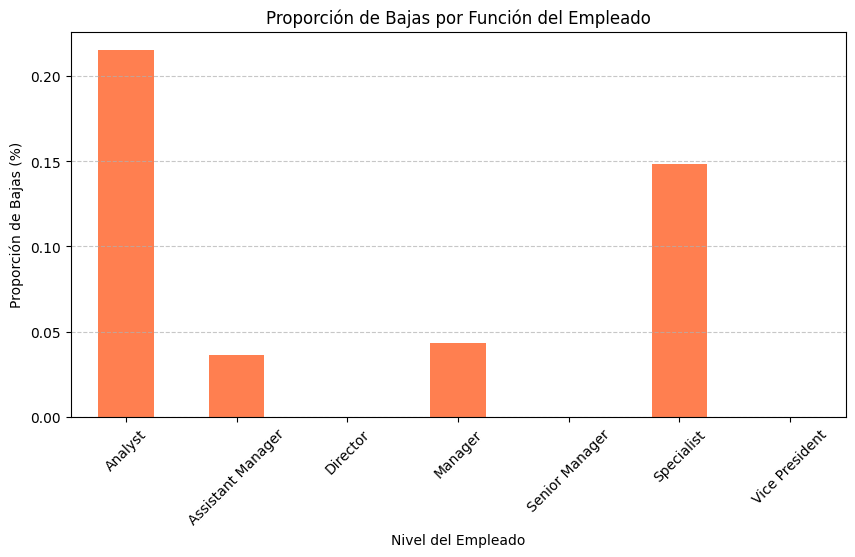

In [3605]:
# Crear gráfico
plt.figure(figsize=(10, 5))
org.groupby("level")["turnover"].mean().plot(kind="bar", color="coral")

# Personalización
plt.title("Proporción de Bajas por Función del Empleado")
plt.xlabel("Nivel del Empleado")
plt.ylabel("Proporción de Bajas (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()

In [3606]:
#Calculamos la proporción de bajas que ha habido en la empresa en función de la localización del empleado(hacer gráfico de barras):
org.groupby('location')['turnover'].mean() 

location
Chicago     0.325641
Florida     0.105513
New York    0.202591
Name: turnover, dtype: float64

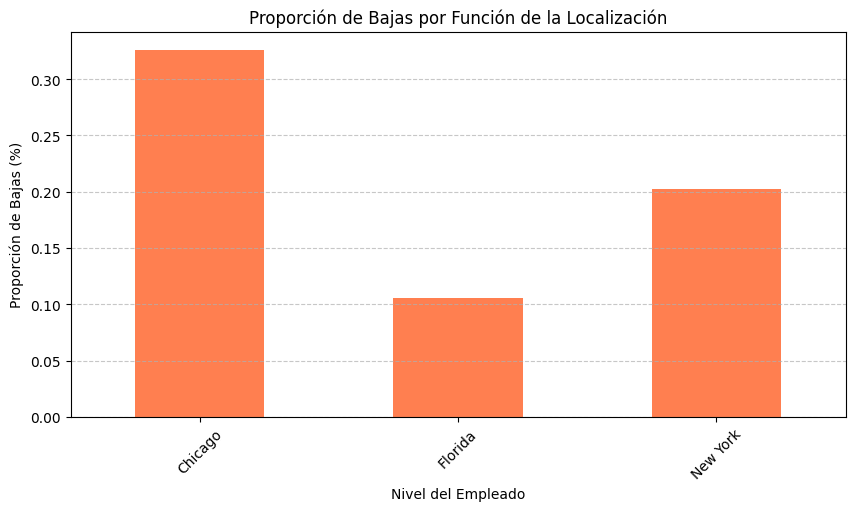

In [3607]:
# Crear gráfico
plt.figure(figsize=(10, 5))
org.groupby('location')['turnover'].mean() .plot(kind="bar", color="coral")

# Personalización
plt.title("Proporción de Bajas por Función de la Localización")
plt.xlabel("Nivel del Empleado")
plt.ylabel("Proporción de Bajas (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()

- **Aproximadamente el 18% de los empleados abandonó la compañía.**

- **Los empleados cuya función dentro de la empresa son Analyst y Specialist tienen la mayor proporción de abandonos en la compañía en comparación con el resto de responsabilidades.**

- **Los empleados que que se localizan en Chicago tienen la mayor proporción de abandonos en la compañía en comparación con el resto de ciudades (Florida, New York).**

In [3608]:
#Segundo fichero de datos:
org_final = pd.read_csv('org_final.csv')
#Cargamos las últimas cinco observaciones:
org_final.tail()

,emp_id,status,location,level,gender,emp_age,rating,mgr_rating,mgr_reportees,mgr_age,...,date_of_joining,last_working_date,department,mgr_id,cutoff_date,turnover,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction
1949,E9960,Active,Orlando,Analyst,Male,27.81,Excellent,Acceptable,17,35.14,...,25/01/2012,NaN,Customer Operations,E3555,31/12/2014,0,0.760,0.85,0.65,0.90
1950,E9977,Active,Orlando,Analyst,Male,27.64,Above Average,Above Average,13,29.76,...,23/09/2009,NaN,Customer Operations,E9218,31/12/2014,0,0.690,0.75,0.67,0.73
1951,E9980,Active,New York,Specialist,Male,27.63,Acceptable,Acceptable,5,36.56,...,18/06/2008,NaN,Customer Operations,E8875,31/12/2014,0,0.460,0.53,0.46,0.66
1952,E9992,Active,Chicago,Specialist,Male,28.34,Acceptable,Acceptable,2,36.41,...,29/07/2011,NaN,Customer Operations,E13055,31/12/2014,0,0.900,0.89,0.93,0.87
1953,E9993,Active,Orlando,Analyst,Female,26.25,Acceptable,Acceptable,26,36.01,...,19/09/2012,NaN,Customer Operations,E3312,31/12/2014,0,0.518,0.89,0.78,0.91


In [3609]:
#Archivo org final,
org_final.shape

(1954, 34)

In [3610]:
#Contamos el número de empleados por función dentro de la empresa. Seleccionamos aquellos cuya función es Analyst y Specialyst (con esta información se crea un nuevo conjunto de datos llamado org_final):
org_final.groupby('level')['level'].value_counts()

level
Analyst       1604
Specialist     350
Name: count, dtype: int64

**Org_final contiene solo información sobre aquellos empleados cuya función dentro de la empresa es Analyst o Specialist, queremos esta información ya que el objetivo de este estudio es intentar ver cuales son las características de las personas que abandonan la empresa y estas dos responsabilidades son las más propensas a dejar la empresa.**

In [3611]:
#Cargamos el archivo rating y vemos el número de filas y columnas que tiene este:
rating = pd.read_csv('rating.csv')
rating.shape

(1954, 2)

In [3612]:
#Juntamos los data.frame propuestos por ID de Empleado: org_final y rating:
org_final_rating = pd.merge(org_final, rating, on = "emp_id", how = "inner")  # "inner" solo mantiene IDs comunes
#Vemos el número de filas y columnas:
org_final_rating.shape

(1954, 35)

In [3613]:
#Mostramos el archivo de datos conjunto:
org_final_rating  #Se puede ver que la columna rating esta repetida en la base de datos.

,emp_id,status,location,level,gender,emp_age,rating_x,mgr_rating,mgr_reportees,mgr_age,...,last_working_date,department,mgr_id,cutoff_date,turnover,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction,rating_y
0,E10012,Active,New York,Analyst,Female,25.09,Above Average,Acceptable,9,44.07,...,NaN,Customer Operations,E9335,31/12/2014,0,0.730,0.73,0.73,0.75,Above Average
1,E10025,Active,Chicago,Analyst,Female,25.98,Acceptable,Excellent,4,35.99,...,NaN,Customer Operations,E6655,31/12/2014,0,0.581,0.72,0.84,0.85,Acceptable
2,E10027,Active,Orlando,Specialist,Female,33.40,Acceptable,Above Average,6,35.78,...,NaN,Customer Operations,E13942,31/12/2014,0,0.770,0.85,0.80,0.87,Acceptable
3,E10048,Active,Chicago,Specialist,Male,24.55,Acceptable,Acceptable,10,26.70,...,NaN,Customer Operations,E7063,31/12/2014,0,0.240,0.42,0.33,0.85,Acceptable
4,E10060,Active,Orlando,Analyst,Male,31.23,Acceptable,Acceptable,11,34.28,...,NaN,Customer Operations,E5663,31/12/2014,0,0.710,0.78,0.67,0.80,Acceptable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,E9960,Active,Orlando,Analyst,Male,27.81,Excellent,Acceptable,17,35.14,...,NaN,Customer Operations,E3555,31/12/2014,0,0.760,0.85,0.65,0.90,Excellent
1950,E9977,Active,Orlando,Analyst,Male,27.64,Above Average,Above Average,13,29.76,...,NaN,Customer Operations,E9218,31/12/2014,0,0.690,0.75,0.67,0.73,Above Average
1951,E9980,Active,New York,Specialist,Male,27.63,Acceptable,Acceptable,5,36.56,...,NaN,Customer Operations,E8875,31/12/2014,0,0.460,0.53,0.46,0.66,Acceptable
1952,E9992,Active,Chicago,Specialist,Male,28.34,Acceptable,Acceptable,2,36.41,...,NaN,Customer Operations,E13055,31/12/2014,0,0.900,0.89,0.93,0.87,Acceptable


In [3614]:
#Agrupamos por rating la proporción de bajas dentro de la empresa:
org_final_rating.groupby("rating_y")["turnover"].mean()

rating_y
Above Average    0.131295
Acceptable       0.220974
Below Average    0.384615
Excellent        0.030534
Unacceptable     0.633333
Name: turnover, dtype: float64

**Se puede ver que el 63.3% de los empleados que calificaron la empresa como 'Inaceptable' abandonaron la empresa. También, de los que clasificaron la empresa en 'Por debajo de la media' el 38.5% de los empleados dejaron de trabajar en la compañía.**

In [3615]:
#Caramos el archivo de datos 'survey' y seleccionamos las primeras cinco observaciones: 
survey = pd.read_csv('survey.csv')
survey.head()

,mgr_id,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction
0,E1003,0.76,0.76,0.71,0.82
1,E10072,0.65,0.67,0.56,0.84
2,E10081,0.80,0.82,0.73,0.84
3,E10234,0.65,0.63,0.75,0.70
4,E1026,0.70,1.00,1.00,0.92


In [3616]:
#Numero de filas y columnas del archivo:
survey.shape

(350, 5)

In [3617]:
#Unimos los dos conjuntos por Id de MGR:
data_churn = pd.merge(org_final_rating, survey, on = "mgr_id", how = 'inner')
data_churn.head()

,emp_id,status,location,level,gender,emp_age,rating_x,mgr_rating,mgr_reportees,mgr_age,...,turnover,mgr_effectiveness_x,career_satisfaction_x,perf_satisfaction_x,work_satisfaction_x,rating_y,mgr_effectiveness_y,career_satisfaction_y,perf_satisfaction_y,work_satisfaction_y
0,E10012,Active,New York,Analyst,Female,25.09,Above Average,Acceptable,9,44.07,...,0,0.730,0.73,0.73,0.75,Above Average,0.730,0.73,0.73,0.75
1,E10025,Active,Chicago,Analyst,Female,25.98,Acceptable,Excellent,4,35.99,...,0,0.581,0.72,0.84,0.85,Acceptable,0.581,0.72,0.84,0.85
2,E10027,Active,Orlando,Specialist,Female,33.40,Acceptable,Above Average,6,35.78,...,0,0.770,0.85,0.80,0.87,Acceptable,0.770,0.85,0.80,0.87
3,E10048,Active,Chicago,Specialist,Male,24.55,Acceptable,Acceptable,10,26.70,...,0,0.240,0.42,0.33,0.85,Acceptable,0.240,0.42,0.33,0.85
4,E10060,Active,Orlando,Analyst,Male,31.23,Acceptable,Acceptable,11,34.28,...,0,0.710,0.78,0.67,0.80,Acceptable,0.710,0.78,0.67,0.80


In [3618]:
#Filas y columnas número:
data_churn.shape

(1954, 39)

In [3619]:
#Eliminar las columnas duplicadas dejando solo una versión. Como hemos hecho un merge() y hay columnas duplicadas en ambos DataFrames (excepto la clave de unión), pandas agrega sufijos como _x e _y.
data_churn = data_churn.loc[:, ~data_churn.columns.str.endswith('_y')]  #Nos elimina las variables con los sufijos _y. 
#Modificamos el nombre de estas columnas:
data_churn = data_churn.rename(columns={
    "rating_x": "rating",
    "mgr_effectiveness_x": "mgr_effectiveness",
    "career_satisfaction_x": "career_satisfaction",
    "perf_satisfaction_x": "perf_satisfaction",
    "work_satisfaction_x": "work_satisfaction"
})
#Filas y columnas de nuestro conjunto de datos final:
data_churn.shape

(1954, 34)

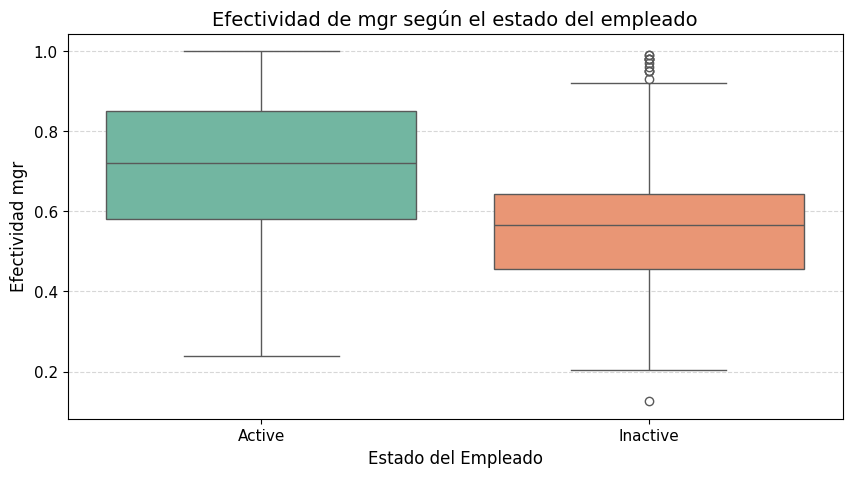

In [3620]:
#Creamos un box-plot que nos indique la efectividad de mgr con el status del empleado:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "status", y = "mgr_effectiveness", hue = "status", data = data_churn, palette = "Set2", legend = False)

# Personalización
plt.title("Efectividad de mgr según el estado del empleado", fontsize = 14)
plt.xlabel("Estado del Empleado", fontsize = 12)
plt.ylabel("Efectividad mgr", fontsize = 12)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.grid(axis = "y", linestyle="--", alpha = 0.5)

# Mostrar gráfico
plt.show()

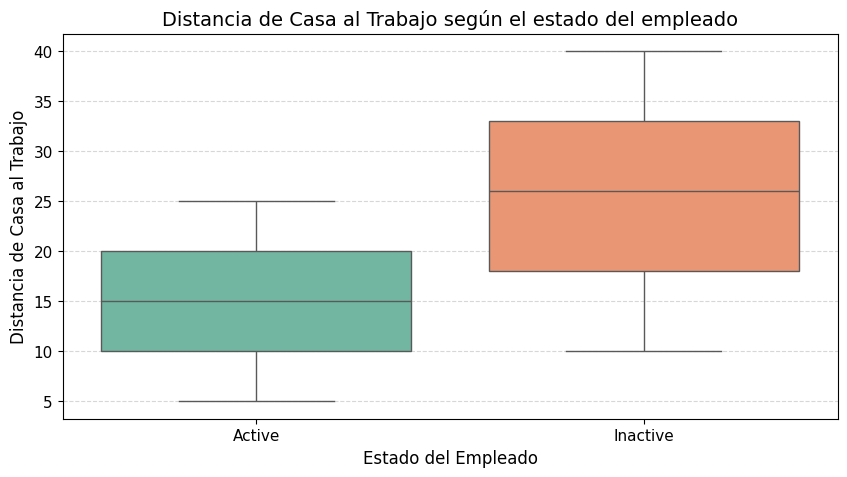

In [3621]:
#Creamos un box-plot que nos indique la distancia de casa al trabajo de los empleados por status del empleado:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "status", y = "distance_from_home", hue = "status", data = data_churn, palette = "Set2", legend = False)

# Personalización del gráfico
plt.title("Distancia de Casa al Trabajo según el estado del empleado", fontsize = 14)
plt.xlabel("Estado del Empleado", fontsize = 12)
plt.ylabel("Distancia de Casa al Trabajo", fontsize = 12)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.grid(axis = "y", linestyle = "--", alpha = 0.5)

# Mostrar gráfico
plt.show()

In [3622]:
data_churn

,emp_id,status,location,level,gender,emp_age,rating,mgr_rating,mgr_reportees,mgr_age,...,date_of_joining,last_working_date,department,mgr_id,cutoff_date,turnover,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction
0,E10012,Active,New York,Analyst,Female,25.09,Above Average,Acceptable,9,44.07,...,06/03/2011,NaN,Customer Operations,E9335,31/12/2014,0,0.730,0.73,0.73,0.75
1,E10025,Active,Chicago,Analyst,Female,25.98,Acceptable,Excellent,4,35.99,...,23/09/2009,NaN,Customer Operations,E6655,31/12/2014,0,0.581,0.72,0.84,0.85
2,E10027,Active,Orlando,Specialist,Female,33.40,Acceptable,Above Average,6,35.78,...,02/11/2005,NaN,Customer Operations,E13942,31/12/2014,0,0.770,0.85,0.80,0.87
3,E10048,Active,Chicago,Specialist,Male,24.55,Acceptable,Acceptable,10,26.70,...,20/05/2011,NaN,Customer Operations,E7063,31/12/2014,0,0.240,0.42,0.33,0.85
4,E10060,Active,Orlando,Analyst,Male,31.23,Acceptable,Acceptable,11,34.28,...,21/12/2011,NaN,Customer Operations,E5663,31/12/2014,0,0.710,0.78,0.67,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,E9960,Active,Orlando,Analyst,Male,27.81,Excellent,Acceptable,17,35.14,...,25/01/2012,NaN,Customer Operations,E3555,31/12/2014,0,0.760,0.85,0.65,0.90
1950,E9977,Active,Orlando,Analyst,Male,27.64,Above Average,Above Average,13,29.76,...,23/09/2009,NaN,Customer Operations,E9218,31/12/2014,0,0.690,0.75,0.67,0.73
1951,E9980,Active,New York,Specialist,Male,27.63,Acceptable,Acceptable,5,36.56,...,18/06/2008,NaN,Customer Operations,E8875,31/12/2014,0,0.460,0.53,0.46,0.66
1952,E9992,Active,Chicago,Specialist,Male,28.34,Acceptable,Acceptable,2,36.41,...,29/07/2011,NaN,Customer Operations,E13055,31/12/2014,0,0.900,0.89,0.93,0.87


## **SEGUNDA PARTE DEL EJERCICIO:**

**En este bloque crearemos tres nuevas variables, que nos aportarán nueva información bastante importante a la hora de ver las características de los trabajadores que abandonan la empresa.**

- #### Diferencia de edad entre el Manager y el Empleado:

In [3623]:
#We are going to calculate the age difference between employees and their respective managers and explore this distribution of age difference between Active and Inactive employees.
#Cremos una nueva columna que indique la diferencia de edad, entre el trabajador y su manager (jefe): 
data_churn["age_difference"] = round(data_churn["mgr_age"] - data_churn["emp_age"],2)

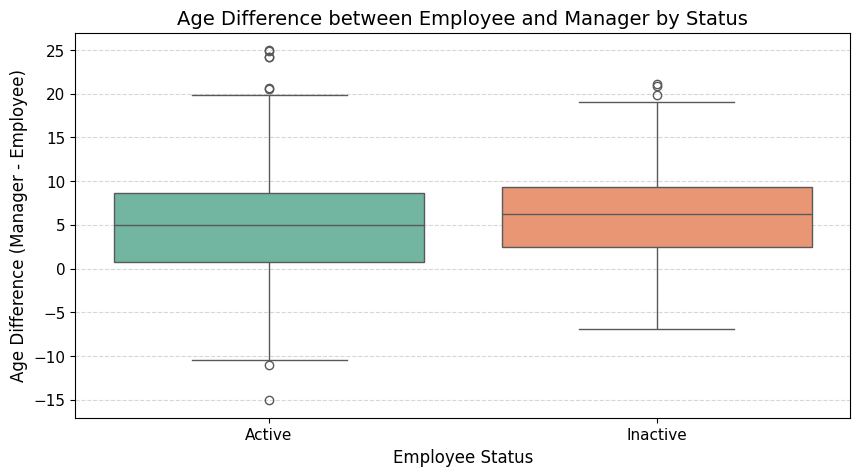

In [3624]:
#Hacemos el respectivo gráfico:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "status", y = "age_difference", hue = "status", data = data_churn, palette = "Set2", legend = False)

# Customization
plt.title("Age Difference between Employee and Manager by Status", fontsize = 14)
plt.xlabel("Employee Status", fontsize = 12)
plt.ylabel("Age Difference (Manager - Employee)", fontsize = 12)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.grid(axis = "y", linestyle="--", alpha = 0.5)

# Show plot
plt.show()

**Existe una gran superposición entre las distribuciones de empleados inactivos y activos. La diferencia de edad mediana entre los empleados inactivos es ligeramente mayor que entre los activos, pero desconocemos si esto es significativo o estadísticamente significativo.**

- #### Índice de Rotación Laboral:

**Job Hop Index** =  $\frac{\text{Total experience}}{\text{Number of companies worked}}$

In [3625]:
data_churn.rename(columns={"no_previous_companies_worked": "no_companies_worked"}, inplace=True)

In [3626]:
#Mínimo los empleados han tenido que trabajar en 1 empresa al menos:
data_churn["no_companies_worked"] = data_churn["no_companies_worked"].replace(0, 1)

In [3627]:
#Calculamos el índice de rotación laboral de cada empleado:
data_churn["job_hop_index"] = round(data_churn["total_experience"] / data_churn["no_companies_worked"],2)

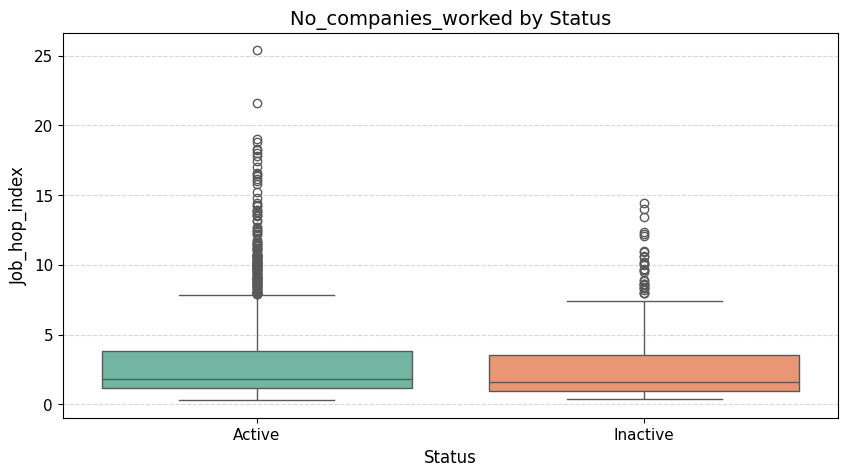

In [3628]:
#Hacemos el respectivo gráfico:
plt.figure(figsize=(10, 5))
sns.boxplot(x = "status", y = "job_hop_index", hue = "status", data = data_churn, palette = "Set2", legend=False)

# Customization
plt.title("No_companies_worked by Status", fontsize=14)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Job_hop_index", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()

**Usando este índice, los empleados leales obtienen una puntuación alta y quienes cambian de trabajo, una puntuación baja.**

**¡La mediana del índice de cambio de trabajo para empleados activos e inactivos es similar!**

- #### DERIVAR LA ANTIGÜEDAD DE LOS AÑOS:

In [3629]:
#Vemos el tipo de dato que es 'date_of_joining', 'last_working_date' y 'cutoff_date':
data_churn.info()
#Observamos que son del tipo 'object', hay transformarlas a formato 'date'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954 entries, 0 to 1953
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   emp_id                  1954 non-null   object 
 1   status                  1954 non-null   object 
 2   location                1954 non-null   object 
 3   level                   1954 non-null   object 
 4   gender                  1954 non-null   object 
 5   emp_age                 1954 non-null   float64
 6   rating                  1954 non-null   object 
 7   mgr_rating              1954 non-null   object 
 8   mgr_reportees           1954 non-null   int64  
 9   mgr_age                 1954 non-null   float64
 10  mgr_tenure              1954 non-null   float64
 11  compensation            1954 non-null   int64  
 12  percent_hike            1954 non-null   int64  
 13  hiring_score            1954 non-null   int64  
 14  hiring_source           1954 non-null   

In [3630]:
#Convertir fechas asegurando el formato correcto (día primero):
data_churn["date_of_joining"] = pd.to_datetime(data_churn["date_of_joining"], dayfirst=True, errors="coerce")
data_churn["last_working_date"] = pd.to_datetime(data_churn["last_working_date"], dayfirst=True, errors="coerce")
data_churn["cutoff_date"] = pd.to_datetime(data_churn["cutoff_date"], dayfirst=True, errors="coerce")

In [3631]:
# Calcular tenure (años):
data_churn["tenure"] = np.where(
    data_churn["status"] == "Active",
    round((data_churn['cutoff_date'] - data_churn["date_of_joining"]).dt.days / 365, 2),  # Empleados Activos
    round((data_churn["last_working_date"] - data_churn["date_of_joining"]).dt.days / 365, 2)  # Empleados Inactivos
)

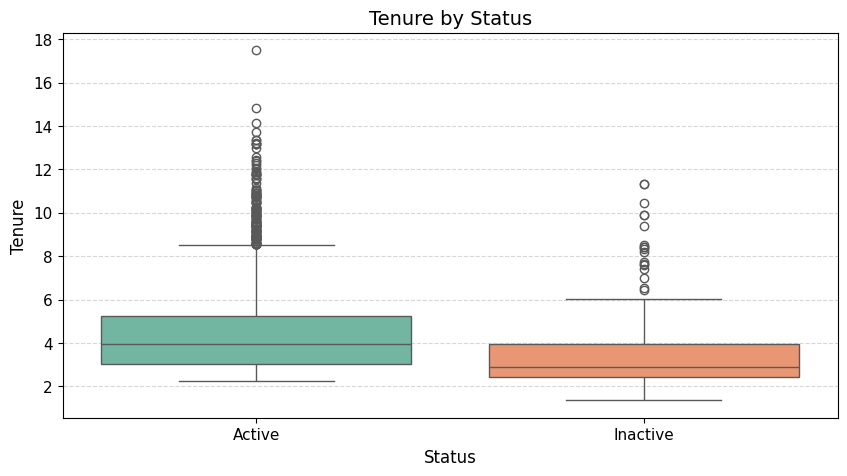

In [3632]:
#Hacemos el respectivo gráfico:
plt.figure(figsize=(10, 5))
sns.boxplot(x = "status", y = "tenure", hue = "status", data = data_churn, palette = "Set2", legend = False)


plt.title("Tenure by Status", fontsize=14)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Tenure", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)


plt.show()

**Como se puede observar, la permanencia media de los empleados inactivos es menor que la de los empleados activos. El 50% de los empleados que están en la empresa llevan menos de 4 años trabajando y el otro 50% restante más de 4 años. El 50% de los empleados que estuvieron en la empresa duraron menos de 3 años. El otro 50% restante mas de 3 años. También podemos observar que el número máximo de años en la empresa para los que están trabajando es de 9 años mientras que para los empleados que ya no traban en la empresa es de 6 años.**

 *Se observan un gran número de valores atípicos.

- #### INFORMACIÓN DE SALARIOS SEGÚN FUNCIÓN:

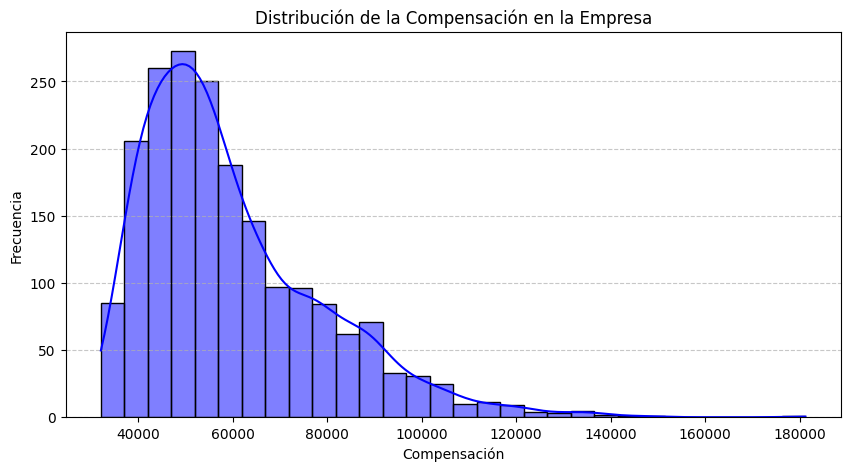

In [3633]:
#Plot the distribution of compensation:

# Ajusta el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Gráfico de distribución (histograma + KDE)
sns.histplot(data = data_churn, x = "compensation", bins = 30, kde = True, color = "blue")

# Personalización
plt.title("Distribución de la Compensación en la Empresa")
plt.xlabel("Compensación")
plt.ylabel("Frecuencia")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)

# Mostrar gráfico
plt.show()

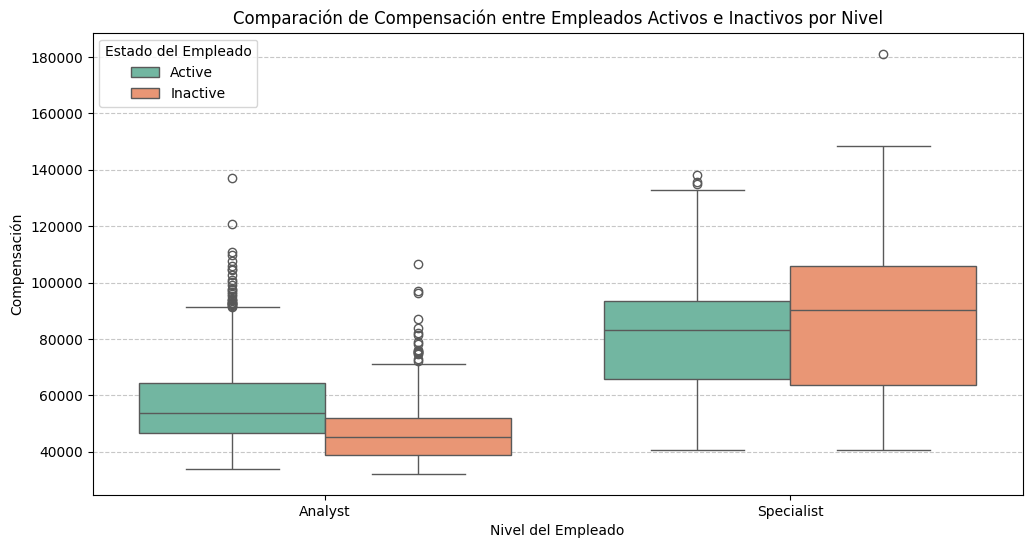

In [3634]:
#Compare compensation of Active and Inactive employees across levels:
# Ajustar el tamaño del gráfico
plt.figure(figsize = (12, 6))

# Crear el boxplot
sns.boxplot(data = data_churn, x = "level", y = "compensation", hue = "status", palette = "Set2")

# Personalización
plt.title("Comparación de Compensación entre Empleados Activos e Inactivos por Nivel")
plt.xlabel("Nivel del Empleado")
plt.ylabel("Compensación")
plt.legend(title = "Estado del Empleado")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)

# Mostrar gráfico
plt.show()

**Hay una gran variabilidad entre el salario de los analistas con los especialistas. Los especialistas tienden a ganar un mayor salario en comparación con los analistas, cabe señalar que los empleados que eran especialistas tenían una compensación más elevada que los empleados actuales en la misma posición.**

**Compa-ratio** =  $\frac{\text{Actual compensation}}{\text{Median compensation}}$

In [3635]:
#Add median_compensation and compa_ratio:
median_comp = data_churn['compensation'].median()
data_churn['compa_ratio'] = round((data_churn['compensation'] / median_comp),2)
#Imprimimos los primeros cinco valores de esta nueva columna creada:
data_churn['compa_ratio'].head()

0    1.17
1    0.88
2    1.57
3    0.90
4    1.38
Name: compa_ratio, dtype: float64

In [3636]:
#Look at the median compensation for each level:
data_churn.groupby(["level"])["compensation"].median()

level
Analyst       51840.0
Specialist    83496.0
Name: compensation, dtype: float64

**Compa-ratio es una medida única para calcular la competitividad salarial de los empleados. Si el valor es <1 podemos decir que el salario esta por debajo del 50% de los trabajadores. No obstante, si el valor >1 el salario es mayor al 50% de los empleados.**

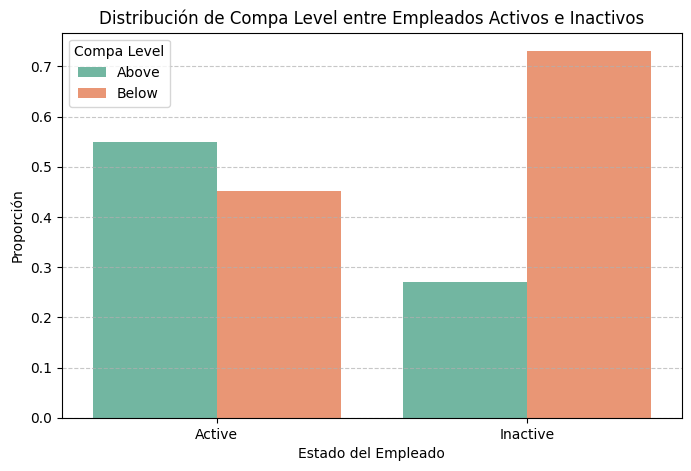

In [3637]:
#Based on compa-ratio, you will calculate compa_level as:
#"Above", if compa-ratio is greater than 1
#"Below", otherwise
#Use compa_ratio to derive compa_level as per the condition mentioned above.
#Create a bar chart of compa_level for active and inactive employees.

# Creamos la nueva columna 'compa_level'. Si es mayor a 1 ('Above') si es menor a 1 ('Below')
data_churn["compa_level"] = data_churn["compa_ratio"].apply(lambda x: "Above" if x > 1 else "Below")

# Calcular proporciones manualmente
compa_counts = data_churn.groupby(["status", "compa_level"]).size().reset_index(name="count")
compa_counts["proportion"] = compa_counts.groupby("status")["count"].transform(lambda x: x / x.sum())

# Graficar barras apiladas normalizadas
plt.figure(figsize=(8, 5))
sns.barplot(data = compa_counts, x = "status", y = "proportion", hue = "compa_level", palette = "Set2")

# Personalización
plt.title("Distribución de Compa Level entre Empleados Activos e Inactivos")
plt.xlabel("Estado del Empleado")
plt.ylabel("Proporción")
plt.legend(title="Compa Level")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)

# Mostrar gráfico
plt.show()


Una mayor proporción de empleados inactivos recibían un salario inferior a la mediana. Esto es un indicador de que aquellos empleados que cobran más, tienen una menor probabilidad de abandonar la empresa.

- #### UTILIZAMOS LA TÉCNICA DEL VALOR DE LA INFORMACIÓN:

IV =  $\sum \left( \% \text{ of non-events} - \% \text{ of events} \right) \times \log \left( \frac{\% \text{ of non-events}}{\% \text{ of events}} \right)$

In [3638]:
#Hacer en R (hay un paquete específico para calcular esta fórmula):
#Tenure of an employee is a strong predictor of turnover. Años de antigÜedad:
#Es decir, 0.9333 (aproximado a 4 decimales).

## **TERCERA PARTE DEL EJERCICIO:**

- #### DIVISIÓN DE DATOS EN ENTRANAMIENTO Y PRUEBA:

Eliminamos algunas variables que no vamos a necesitar a la hora construir nuestra regresión logística, estas van a ser:

- **Los Id de empleado y manager**

- **Fecha de incorporación, Último día de trabajo, Fecha de corte (la variable Años de AntigÜedad es combinación lineal de todas estas)**

- **mgr_age, emp_age (ya que age_diff es combinación lineal de estas dos columnas)**

- **department (ya que solamente tenemos un solo valor para esta columna)**

- **status (ya que la variable 'turnover' nos indica lo mismo, es la variable que hemos dicotomizado)**

In [3639]:
data_churn = data_churn.drop(columns = ['emp_id','mgr_id','date_of_joining','last_working_date','cutoff_date','mgr_age','emp_age','department','status'])

In [3640]:
# Lista de índices de las columnas a excluir e incluir:
variables_cualitativas = [0, 1, 2, 3, 4, 10, 14, 15, 16, 29]

# Aplicar get_dummies excluyendo esas columnas
data_churn_cualitative = data_churn.iloc[:, variables_cualitativas]

#Vemos el data.frame propuesto para las variables categóricas:
data_churn_cualitative

,location,level,gender,rating,mgr_rating,hiring_source,marital_status,education,promotion_last_2_years,compa_level
0,New York,Analyst,Female,Above Average,Acceptable,Consultant,Single,Bachelors,No,Above
1,Chicago,Analyst,Female,Acceptable,Excellent,Job Fairs,Single,Bachelors,No,Below
2,Orlando,Specialist,Female,Acceptable,Above Average,Consultant,Single,Bachelors,Yes,Above
3,Chicago,Specialist,Male,Acceptable,Acceptable,Job Boards,Single,Bachelors,Yes,Below
4,Orlando,Analyst,Male,Acceptable,Acceptable,Job Fairs,Single,Bachelors,No,Above
...,...,...,...,...,...,...,...,...,...,...
1949,Orlando,Analyst,Male,Excellent,Acceptable,Job Boards,Single,Bachelors,No,Above
1950,Orlando,Analyst,Male,Above Average,Above Average,Employee Referral,Single,Bachelors,No,Above
1951,New York,Specialist,Male,Acceptable,Acceptable,Social Media,Single,Bachelors,Yes,Above
1952,Chicago,Specialist,Male,Acceptable,Acceptable,Walk-In,Married,Bachelors,Yes,Above


In [3641]:
#Tomamos aquellas variables cuantitativas:
data_churn_quantitative = data_churn.drop(columns = data_churn.columns[variables_cualitativas]) 
#Vemos el conjunto de variables: 
data_churn_quantitative

,mgr_reportees,mgr_tenure,compensation,percent_hike,hiring_score,no_companies_worked,distance_from_home,total_dependents,no_leaves_taken,total_experience,monthly_overtime_hrs,turnover,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction,age_difference,job_hop_index,tenure,compa_ratio
0,9,3.17,64320,10,70,1,14,2,2,6.86,1,0,0.730,0.73,0.73,0.75,18.98,6.86,3.82,1.17
1,4,7.92,48204,8,70,9,21,2,10,4.88,5,0,0.581,0.72,0.84,0.85,10.01,0.54,5.27,0.88
2,6,4.38,85812,11,77,3,15,5,18,8.55,3,0,0.770,0.85,0.80,0.87,2.38,2.85,9.17,1.57
3,10,2.87,49536,8,71,5,9,3,19,4.76,8,0,0.240,0.42,0.33,0.85,2.15,0.95,3.62,0.90
4,11,12.95,75576,12,70,1,25,4,25,8.06,1,0,0.710,0.78,0.67,0.80,3.05,8.06,3.03,1.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,17,11.34,71388,12,71,2,8,2,16,8.10,2,0,0.760,0.85,0.65,0.90,7.33,4.05,2.93,1.30
1950,13,9.54,65628,10,81,2,24,5,10,5.20,4,0,0.690,0.75,0.67,0.73,2.12,2.60,5.27,1.20
1951,5,13.02,77520,13,75,4,23,3,7,9.70,4,0,0.460,0.53,0.46,0.66,8.93,2.42,6.54,1.42
1952,2,2.98,69780,7,75,7,20,4,11,10.00,5,0,0.900,0.89,0.93,0.87,8.07,1.43,3.43,1.27


In [3642]:
# Aplicar get_dummies:
data_churn_categorical = pd.get_dummies(data_churn_cualitative, drop_first = True)
#Visualizamos el data_frame:
data_churn_categorical

,location_New York,location_Orlando,level_Specialist,gender_Male,rating_Acceptable,rating_Below Average,rating_Excellent,rating_Unacceptable,mgr_rating_Acceptable,mgr_rating_Below Average,...,hiring_source_Consultant,hiring_source_Employee Referral,hiring_source_Job Boards,hiring_source_Job Fairs,hiring_source_Social Media,hiring_source_Walk-In,marital_status_Single,education_Masters,promotion_last_2_years_Yes,compa_level_Below
0,True,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
2,False,True,True,False,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
3,False,False,True,True,True,False,False,False,True,False,...,False,False,True,False,False,False,True,False,True,True
4,False,True,False,True,True,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,False,True,False,True,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,False,False
1950,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1951,True,False,True,True,True,False,False,False,True,False,...,False,False,False,False,True,False,True,False,True,False
1952,False,False,True,True,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [3643]:
#Ahora el conjunto de datos se va a llamar df:
df = pd.concat([data_churn_categorical,data_churn_quantitative], axis = 1)
#Visualizamos las primeras 5 observaciones del nuevo conjunto de datos creado:
df.head()

,location_New York,location_Orlando,level_Specialist,gender_Male,rating_Acceptable,rating_Below Average,rating_Excellent,rating_Unacceptable,mgr_rating_Acceptable,mgr_rating_Below Average,...,monthly_overtime_hrs,turnover,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction,age_difference,job_hop_index,tenure,compa_ratio
0,True,False,False,False,False,False,False,False,True,False,...,1,0,0.730,0.73,0.73,0.75,18.98,6.86,3.82,1.17
1,False,False,False,False,True,False,False,False,False,False,...,5,0,0.581,0.72,0.84,0.85,10.01,0.54,5.27,0.88
2,False,True,True,False,True,False,False,False,False,False,...,3,0,0.770,0.85,0.80,0.87,2.38,2.85,9.17,1.57
3,False,False,True,True,True,False,False,False,True,False,...,8,0,0.240,0.42,0.33,0.85,2.15,0.95,3.62,0.90
4,False,True,False,True,True,False,False,False,True,False,...,1,0,0.710,0.78,0.67,0.80,3.05,8.06,3.03,1.38


In [3644]:
X = df.drop('turnover', axis = 1) #Variables regresoras (independientes)
y = df['turnover'] #Variable respuesta (dependiente)

In [3645]:
#Copiamos el DataFrame original:
X_norm = X.copy()

#Seleccionamos solo columnas numéricas a la hora de normalizarlas:
numeric_cols = X_norm.select_dtypes(include=['number']).columns

#Inicializar el scaler:
scaler = StandardScaler()

#Ajustar y transformar solo las columnas numéricas:
X_norm[numeric_cols] = scaler.fit_transform(X_norm[numeric_cols])

# Verificar el resultado
X_norm.head()

,location_New York,location_Orlando,level_Specialist,gender_Male,rating_Acceptable,rating_Below Average,rating_Excellent,rating_Unacceptable,mgr_rating_Acceptable,mgr_rating_Below Average,...,total_experience,monthly_overtime_hrs,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction,age_difference,job_hop_index,tenure,compa_ratio
0,True,False,False,False,False,False,False,False,True,False,...,-0.402679,-1.262551,0.277181,-0.368400,-0.111371,-0.744441,2.560278,1.238838,-0.278189,0.217638
1,False,False,False,False,True,False,False,False,False,False,...,-0.985344,-0.153776,-0.545451,-0.432262,0.500387,0.177207,0.922897,-0.812299,0.358051,-0.609724
2,False,True,True,False,True,False,False,False,False,False,...,0.094645,-0.708164,0.498022,0.397945,0.277930,0.361537,-0.469881,-0.062596,2.069320,1.358827
3,False,False,True,True,True,False,False,False,True,False,...,-1.020657,0.677806,-2.428118,-2.348125,-2.335947,0.177207,-0.511865,-0.679235,-0.365947,-0.552665
4,False,True,False,True,True,False,False,False,True,False,...,-0.049549,-1.262551,0.166761,-0.049089,-0.445058,-0.283617,-0.347579,1.628294,-0.624831,0.816762


In [3646]:
bool_cols = X_norm.select_dtypes(include=['bool']).columns
X_norm[bool_cols] = X_norm[bool_cols].astype(float)   #Todas las columnas son del tipo float, ya son todas las variables numéricas!
X_norm.head()

,location_New York,location_Orlando,level_Specialist,gender_Male,rating_Acceptable,rating_Below Average,rating_Excellent,rating_Unacceptable,mgr_rating_Acceptable,mgr_rating_Below Average,...,total_experience,monthly_overtime_hrs,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction,age_difference,job_hop_index,tenure,compa_ratio
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.402679,-1.262551,0.277181,-0.368400,-0.111371,-0.744441,2.560278,1.238838,-0.278189,0.217638
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.985344,-0.153776,-0.545451,-0.432262,0.500387,0.177207,0.922897,-0.812299,0.358051,-0.609724
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.094645,-0.708164,0.498022,0.397945,0.277930,0.361537,-0.469881,-0.062596,2.069320,1.358827
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-1.020657,0.677806,-2.428118,-2.348125,-2.335947,0.177207,-0.511865,-0.679235,-0.365947,-0.552665
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.049549,-1.262551,0.166761,-0.049089,-0.445058,-0.283617,-0.347579,1.628294,-0.624831,0.816762


In [3647]:
#Dividimos el conjunto de datos propuesto en entrenamineto y prueba (normalizado):
X_train, X_test, y_train, y_test = train_test_split (X_norm , y, test_size = 0.3, random_state = 567)  #Fijamos una semilla de 567

#Dividimos el conjunto de datos propuesto en entrenamineto y prueba (sin normalizar), esto lo hacemos para crear los rangos de percent_hike:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split (X , y, test_size = 0.3, random_state = 567)  #Fijamos una semilla de 567

In [3648]:
print(y_train.value_counts(normalize=True))  # Proporción de 0 y 1 en train
print(y_test.value_counts(normalize=True))  # Proporción de 0 y 1 en test

turnover
0    0.793709
1    0.206291
Name: proportion, dtype: float64
turnover
0    0.804089
1    0.195911
Name: proportion, dtype: float64


- #### REGRESIÓN LOGÍSTICA BINARIA:

$P(Y = 1) = \frac{1}{1 + e^{- \left( \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_k X_k \right)}}$

In [3649]:
#Hacemos una regresión logística binaria, siendo la variable respuesta 'turnover'.

#Aquí estamos usando la libería 'Scikit-Learn' ya que está optimizada para la predicción (machine-learning) y además tiene integración con otras herramientas 'Pipeline' y 'GridSearchCV'.

#La principal desventaje de esta librería es que no da p-valores ni intervalos de confianza, lo que lo hace menos útil para análisis estadístico puro.

#IMPORTANTE!!!
#No pasa absolutamente nada malo si usamos 1 y 0 en vez de True y False. De hecho, en 'scikit-learn' es recomendable.
#Podemos usar 1/0 o True/False en scikit-learn sin problema.
#Recomendado: usar 1/0 para consistencia, legibilidad y compatibilidad futura.
#scikit-learn es flexible, pero si piensas en otras librerías, 1/0 es el estándar.

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_predict = model1.predict(X_test)

In [3650]:
#Evaluamos con statsmodels (para p-valores):

#Usamos la librería 'statsmodels' ya que nos proporciona un análisis estadístico puro (p-valores, estadísticos,...).

#Esta librería es ideal si queremos entender el impacto de cada variable en el modelo.

#IMPORTANTE!!!
#En statsmodels, se necesita que los datos sean float o int para que los cálculos matemáticos funcionen bien en todas las variables.

X_train_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Mostramos la tabla de coeficientes y p-valores
print(result.summary())

         Current function value: 0.110076
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               turnover   No. Observations:                 1367
Model:                          Logit   Df Residuals:                     1325
Method:                           MLE   Df Model:                           41
Date:                Sun, 30 Mar 2025   Pseudo R-squ.:                  0.7837
Time:                        23:08:25   Log-Likelihood:                -150.47
converged:                      False   LL-Null:                       -695.80
Covariance Type:            nonrobust   LLR p-value:                6.509e-202
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -6.6714      0.994     -6.711      0.000      -8.620      -4.723
lo

/Users/joseluismadrona/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


"Optimization failed to converge.": Significa que el algoritmo numérico que busca estimar los coeficientes no pudo encontrar una solución óptima. En el caso de Logit de statsmodels, usa Maximum Likelihood Estimation (MLE) y algoritmos de optimización iterativos que:

- **Pueden atascarse si los datos no son amigables.**

- **No logran minimizar la función de pérdida (el log likelihood).**

**Este problema se da porque tenemos un problema de colinealidad de variables: Variables que están fuertemente correlacionadas entre sí.**

Vamos a solucionar el problema:

- #### TRATAMIENTO DE MULTICOLINEALIDAD (VIF):

In [3651]:
# Agregamos la constante para el cálculo de VIF
X_train_const = sm.add_constant(X_train)

# Calculamos el VIF para cada variable:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

# Mostramos los resultados
vif_data

,Variable,VIF
0,const,26.739994
1,location_New York,1.539984
2,location_Orlando,1.730824
3,level_Specialist,4.972177
4,gender_Male,1.187226
5,rating_Acceptable,1.595343
6,rating_Below Average,1.978289
7,rating_Excellent,1.272661
8,rating_Unacceptable,1.490858
9,mgr_rating_Acceptable,1.485978


In [3652]:
#Todas las variables que tengan un VIF > 10 significa que tienen un problema de colinealidad alta. Por lo tanto, es necesaria eliminarla y volver a aplicar este método.
#Cuando todas nuestras variables tengan un VIF < 10 significa que ya no tenemos un problema de multicolinealidad.
#Por tanto, vamos a eliminar la variable 'compensation' que tiene un VIF de 14879,456972 > 10, de nuestro modelo de regresión logística.
X_train_final = X_train.drop(columns = ['compensation'], axis = 1)

#Ajustamos de nuevo el modelo:
X_train_const = sm.add_constant(X_train_final)
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Mostramos la tabla de coeficientes y p-valores
print(result.summary())

         Current function value: 0.110076
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               turnover   No. Observations:                 1367
Model:                          Logit   Df Residuals:                     1326
Method:                           MLE   Df Model:                           40
Date:                Sun, 30 Mar 2025   Pseudo R-squ.:                  0.7837
Time:                        23:08:25   Log-Likelihood:                -150.47
converged:                      False   LL-Null:                       -695.80
Covariance Type:            nonrobust   LLR p-value:                1.239e-202
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -6.6690      0.992     -6.724      0.000      -8.613      -4.725
lo

/Users/joseluismadrona/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Cuidado con los coeficientes grandes! Esto indica un problema correlación entre la variable 'level_Specialist' y 'promotion_last_2_years_Yes'. Hay que eliminar una de estas variables.**

In [3653]:
#Medimos la correlación entre estas dos variables 'level_Specialist' y 'promotion_last_2_years_Yes':
X_train_final[['level_Specialist', 'promotion_last_2_years_Yes']].corr()  #Hay un 0.864562 de correlación entre este par de variables!!!!!!

,level_Specialist,promotion_last_2_years_Yes
level_Specialist,1.000000,0.864562
promotion_last_2_years_Yes,0.864562,1.000000


In [3654]:
# Agregamos la constante para el cálculo de VIF
X_train_const = sm.add_constant(X_train_final)

#Calculamos de nuevo el VIF:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

# Mostramos los resultados:
vif_data   #Ya no tenemos un problema de multicolinealidad. Hemos resuelto el problema! Todas las variables tienen un VIF < 10.

,Variable,VIF
0,const,26.736048
1,location_New York,1.539944
2,location_Orlando,1.729060
3,level_Specialist,4.972091
4,gender_Male,1.187095
5,rating_Acceptable,1.593979
6,rating_Below Average,1.978210
7,rating_Excellent,1.272624
8,rating_Unacceptable,1.490381
9,mgr_rating_Acceptable,1.484039


In [3655]:
#Elimiamos la variable 'level_Specialist' ya que tiene un valores muy altos en los coeficientes del modelo:
X_train_final = X_train.drop(columns = ['level_Specialist', 'compensation'], axis = 1)

#Ajustamos de nuevo el modelo:
X_train_const = sm.add_constant(X_train_final)
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Mostramos la tabla de coeficientes y p-valores
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.115270
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               turnover   No. Observations:                 1367
Model:                          Logit   Df Residuals:                     1327
Method:                           MLE   Df Model:                           39
Date:                Sun, 30 Mar 2025   Pseudo R-squ.:                  0.7735
Time:                        23:08:25   Log-Likelihood:                -157.57
converged:                       True   LL-Null:                       -695.80
Covariance Type:            nonrobust   LLR p-value:                2.213e-200
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -6.4176      0.960     -6.687 

Cada coeficiente ($\beta$) representa el cambio en el logaritmo de las probabilidades (log-odds) de que el evento turnover = 1 ocurra, dado un incremento unitario en la variable independiente, manteniendo las demás constantes.

•	Si el coeficiente es positivo, indica que un aumento en esa variable incrementa la probabilidad de que el empleado se vaya.

•	Si el coeficiente es negativo, significa que un aumento en esa variable reduce la probabilidad de turnover.

Para una interpretación más intuitiva, puedes convertir los coeficientes a odds ratios ($e^\beta$), que indican cuántas veces más (o menos) probable es el evento cuando la variable aumenta en una unidad.


- ## Interpretación de los coeficientes de la regresión logística

Cada coeficiente ($\beta$) indica cómo afecta cada variable a la probabilidad de que un empleado renuncie (*turnover*).

### 1. Estado civil: Soltero
- **Coeficiente:** $ \beta = 2.4747 $, $ p < 0.001 $
- **Interpretación:** Los empleados solteros tienen una mayor probabilidad de renunciar en comparación con los casados.
- **Odds ratio:** $ e^{2.4747} \approx 11.87 $  
  → Los empleados solteros tienen **11.87 veces más probabilidades** de renunciar que los casados.

### 2. Distancia al trabajo
- **Coeficiente:** $ \beta = 1.7398 $, $ p < 0.001 $
- **Interpretación:** Cuanto más lejos vive un empleado de la oficina, más probable es que renuncie.
- **Odds ratio:** $ e^{1.7398} \approx 5.69 $  
  → Cada unidad de aumento en la distancia hace que el empleado sea **5.69 veces más propenso** a renunciar.

### 3. Antigüedad en la empresa (*Tenure*)
- **Coeficiente:** $ \beta = -1.4097 $, $ p < 0.001 $
- **Interpretación:** A mayor tiempo en la empresa, menor es la probabilidad de renuncia.
- **Odds ratio:** $ e^{-1.4097} \approx 0.24 $  
  → Cada año adicional en la empresa **reduce en un 76%** la probabilidad de renuncia.

### 4. Horas extra mensuales
- **Coeficiente:** $ \beta = 0.8885 $, $ p < 0.001 $
- **Interpretación:** Más horas extras mensuales aumentan el riesgo de renuncia.
- **Odds ratio:** $ e^{0.8885} \approx 2.43 $  
  → Cada hora adicional de horas extras **incrementa en 143% la probabilidad** de renuncia.

### 5. Aumento salarial (*Percent Hike*)
- **Coeficiente:** $ \beta = -1.9222 $, $ p < 0.001 $
- **Interpretación:** Un mayor aumento salarial reduce la probabilidad de renuncia.
- **Odds ratio:** $ e^{-1.9222} \approx 0.15 $  
  → Los empleados que reciben aumentos salariales tienen **85% menos probabilidades** de renunciar.

---

### 📌 Conclusiones:
✅ **Factores que aumentan la probabilidad de renuncia:**
  - Ser soltero
  - Mayor distancia al trabajo
  - Más horas extras

✅ **Factores que reducen la probabilidad de renuncia:**
  - Mayor tiempo en la empresa
  - Recibir aumentos salariales

In [3656]:
# Agregamos la constante para el cálculo de VIF
X_train_const = sm.add_constant(X_train_final)

#Calculamos de nuevo el VIF:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

# Mostramos los resultados:
vif_data   #Ya no tenemos un problema de multicolinealidad. Hemos resuelto el problema! Todas las variables tienen un VIF < 10.

,Variable,VIF
0,const,26.714402
1,location_New York,1.521929
2,location_Orlando,1.685202
3,gender_Male,1.178960
4,rating_Acceptable,1.589265
5,rating_Below Average,1.977304
6,rating_Excellent,1.269974
7,rating_Unacceptable,1.489145
8,mgr_rating_Acceptable,1.481114
9,mgr_rating_Below Average,1.338952


- #### VALIDACIÓN DE RESULTADOS REGRESIÓN LOGÍSTICA:

In [3657]:
#Eliminamos la variable 'compensation' de nuestro conjunto de datos 'test':
X_test_final = X_test.drop(columns = ['compensation', 'level_Specialist'], axis = 1)

In [3658]:
#Modelo final:
model2 = LogisticRegression()
model2.fit(X_train_final, y_train)
y_predict_final = model2.predict(X_test_final)

In [3659]:
#Crear la matriz de confusión, para el modelo anterior (con variable 'compensation' y 'level_Specialist'):
cm = confusion_matrix(y_test, y_predict)
cm

array([[447,  25],
       [ 26,  89]])

In [3660]:
#Crear la matriz de confusión, para el modelo final (model2):
cm2 = confusion_matrix(y_test, y_predict_final)
cm2

array([[445,  27],
       [ 26,  89]])

In [3661]:
#Como 'compensation' tiene una alta correlación con otras variables (multicolinealidad), su ausencia no afecta mucho al modelo porque su información ya está contenida en otras variables. La variable no aporta información relevante.
#La multicolinealidad puede inflar los coeficientes de la regresión logística, lo que hace difícil interpretar la importancia de cada variable. Como queremos interpretar los coeficientes del modelo tenemos que quitar la variable 'compensation'.
#Si el objetivo es solo predecir, podríamos dejar la variable porque no afecta el desempeño.
#Si queremos interpretar los coeficientes para entender qué variables influyen en el resultado, entonces es mejor eliminarla para evitar coeficientes engañosos.

model2.score(X_test_final, y_test)

0.909710391822828

- #### Realizamos validación cruzada repetida:

In [3662]:
#Validación cruzada con 6 divisiones, shuffle = True (los datos se barajan antes de dividirse), semilla (567):
kf = KFold(n_splits = 6, shuffle = True, random_state = 567)
#Eliminamos de X_norm aquellas variables que hemos de nuestro conjunto de datos que nos daban problemas de multicolinealidad o problemas en los coef. (valores grandes) del modelo:
X_norm = X_norm.drop(columns = ['compensation', 'level_Specialist'], axis = 1)
#Realizamos la validación cruzada del modelo 2, con las variables regresoras de X_norm y variables respuesta (y):
cv_results = cross_val_score(model2, X_norm, y, cv = kf)

In [3663]:
#Imprimimos los resultados:
print(cv_results)

[0.92638037 0.90797546 0.95092025 0.94478528 0.96       0.95384615]


$ \text{Accuracy} = \frac{\text{N° de predicciones correctas}}{\text{Total de muestras}} $

In [3664]:
#Accuracy medio de los 6 modelos propuestos calculados por validación cruzada.
print(np.mean(cv_results), np.std(cv_results))

0.9406512505899008 0.017992532555252436


In [3665]:
#Intervalo de confianza de score:
print(np.quantile(cv_results, [0.025, 0.975]))

[0.91027607 0.95923077]


- **El modelo tiene un buen desempeño promedio en los diferentes subconjuntos de validación (valor medio accuracy).**

- **El modelo es estable, es decir, su rendimiento no varía mucho en los diferentes splits de la validación cruzada (desv.típica).** 

- **Calculando el IC el accuracy se situa entre 0.91027 y 0.9592.**

## **CUARTA PARTE DEL EJERCICIO:**

**En este paso, calculamos una estrategia de intervención para ver que hacemos con esos empleados que tienen mayores probailidades de dejar la empresa. Calcularemos el ROI (retorno de la inversión) para esta estrategia.**

In [3666]:
probabilidades = model2.predict_proba(X_test_final)
probabilidades

array([[0.67289229, 0.32710771],
       [0.99238033, 0.00761967],
       [0.15240764, 0.84759236],
       ...,
       [0.00458743, 0.99541257],
       [0.97180626, 0.02819374],
       [0.97680247, 0.02319753]])

In [3667]:
# Convertir y_predict_final a DataFrame si es un array:
df_y_pred = pd.DataFrame({"y_predict_final": y_predict_final}, index = X_test_final.index)
# Unirlo con X_test_final:
HR_Interventions = pd.concat([X_test_final, df_y_pred], axis=1)
# Verificamos el resultado
HR_Interventions.head()

,location_New York,location_Orlando,gender_Male,rating_Acceptable,rating_Below Average,rating_Excellent,rating_Unacceptable,mgr_rating_Acceptable,mgr_rating_Below Average,mgr_rating_Excellent,...,monthly_overtime_hrs,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction,age_difference,job_hop_index,tenure,compa_ratio,y_predict_final
1272,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.400612,-0.313568,0.781118,0.889688,0.730196,-0.301944,0.278179,-0.247474,-0.495605,0
1299,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.400612,-1.047863,0.206359,-0.222600,-2.311242,0.568770,-0.585116,-0.624831,-0.552665,0
35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.677806,-0.661392,0.461807,0.111086,0.730196,-1.472024,0.680617,-0.945145,-0.638254,1
1000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.786581,-2.477807,-2.731297,-2.169104,-0.652276,-0.254484,1.190156,-0.392274,-1.009141,1
77,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.262551,0.221971,-0.112952,-0.278214,0.085043,-0.568452,-0.409861,-0.651158,1.957951,0


In [3668]:
# Si probabilidades es una matriz, obtener la segunda columna (probabilidad de la clase positiva)
df_y_pred_probs = pd.DataFrame({"y_probs": probabilidades[:, 1]}, index=X_test_final.index)
# Unirlo con X_test_final
HR_Interventions  = pd.concat([HR_Interventions , df_y_pred_probs], axis=1)
# Verificamos el resultado
HR_Interventions.head()

,location_New York,location_Orlando,gender_Male,rating_Acceptable,rating_Below Average,rating_Excellent,rating_Unacceptable,mgr_rating_Acceptable,mgr_rating_Below Average,mgr_rating_Excellent,...,mgr_effectiveness,career_satisfaction,perf_satisfaction,work_satisfaction,age_difference,job_hop_index,tenure,compa_ratio,y_predict_final,y_probs
1272,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.313568,0.781118,0.889688,0.730196,-0.301944,0.278179,-0.247474,-0.495605,0,0.327108
1299,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.047863,0.206359,-0.222600,-2.311242,0.568770,-0.585116,-0.624831,-0.552665,0,0.007620
35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.661392,0.461807,0.111086,0.730196,-1.472024,0.680617,-0.945145,-0.638254,1,0.847592
1000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-2.477807,-2.731297,-2.169104,-0.652276,-0.254484,1.190156,-0.392274,-1.009141,1,0.932344
77,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.221971,-0.112952,-0.278214,0.085043,-0.568452,-0.409861,-0.651158,1.957951,0,0.016074


In [3669]:
# Crear los 'buckets' de riesgo (similar a 'cut' en R)
bins = [0, 0.5, 0.6, 0.8, 1]
labels = ["no-risk", "low-risk", "medium-risk", "high-risk"]

# Crear la columna de 'risk_bucket'
HR_Interventions['risk_bucket'] = pd.cut(HR_Interventions ['y_probs'], bins = bins, labels = labels, right = False)

# Contar el número de empleados en cada bucket de riesgo
risk_counts = HR_Interventions ['risk_bucket'].value_counts()
risk_counts

risk_bucket
no-risk        471
high-risk       79
medium-risk     21
low-risk        16
Name: count, dtype: int64

**Actions we should take to retain this employee?**

- Engage in a conversation with this employee to generally understand the perspective about work and future plans.
- Ask the employee's manager to have a conversation and explore the engagement levels and concerns, if any.

In [3670]:
# Crear los rangos de percent_hike:
bins = [0, 10, 15, 20]
labels = ["0 to 10", "11 to 15", "16 to 20"]

#'hike_range' hace referencia al incremento porcentual salarial:
X_test_2['hike_range'] = pd.cut(X_test_2['percent_hike'], bins = bins, labels = labels, right = False)  

# Ver los resultados:
emp_hike_range = X_test_2[['hike_range','percent_hike']]

#Cambiar el nombre de la columna 'percent_hike' a 'percent_hike_norm':
HR_Interventions.rename(columns={'percent_hike': 'percent_hike_norm'}, inplace=True)

# Verificar el cambio
HR_Interventions.head()

,location_New York,location_Orlando,gender_Male,rating_Acceptable,rating_Below Average,rating_Excellent,rating_Unacceptable,mgr_rating_Acceptable,mgr_rating_Below Average,mgr_rating_Excellent,...,career_satisfaction,perf_satisfaction,work_satisfaction,age_difference,job_hop_index,tenure,compa_ratio,y_predict_final,y_probs,risk_bucket
1272,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.781118,0.889688,0.730196,-0.301944,0.278179,-0.247474,-0.495605,0,0.327108,no-risk
1299,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.206359,-0.222600,-2.311242,0.568770,-0.585116,-0.624831,-0.552665,0,0.007620,no-risk
35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.461807,0.111086,0.730196,-1.472024,0.680617,-0.945145,-0.638254,1,0.847592,high-risk
1000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-2.731297,-2.169104,-0.652276,-0.254484,1.190156,-0.392274,-1.009141,1,0.932344,high-risk
77,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.112952,-0.278214,0.085043,-0.568452,-0.409861,-0.651158,1.957951,0,0.016074,no-risk


In [3679]:
HR_Interventions  = pd.concat([HR_Interventions , emp_hike_range], axis=1)
HR_Interventions.tail()

,location_New York,location_Orlando,gender_Male,rating_Acceptable,rating_Below Average,rating_Excellent,rating_Unacceptable,mgr_rating_Acceptable,mgr_rating_Below Average,mgr_rating_Excellent,...,compa_ratio,y_predict_final,y_probs,risk_bucket,hike_range,percent_hike,turnover,turnover,hike_range,percent_hike
1727,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.837962,0,0.002601,no-risk,0 to 10,5,0,0,0 to 10,5
536,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.788232,0,0.000011,no-risk,11 to 15,14,0,0,11 to 15,14
18,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.666784,1,0.995413,high-risk,0 to 10,5,1,1,0 to 10,5
211,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.702643,0,0.028194,no-risk,0 to 10,8,0,0,0 to 10,8
156,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.474405,0,0.023198,no-risk,0 to 10,6,1,1,0 to 10,6


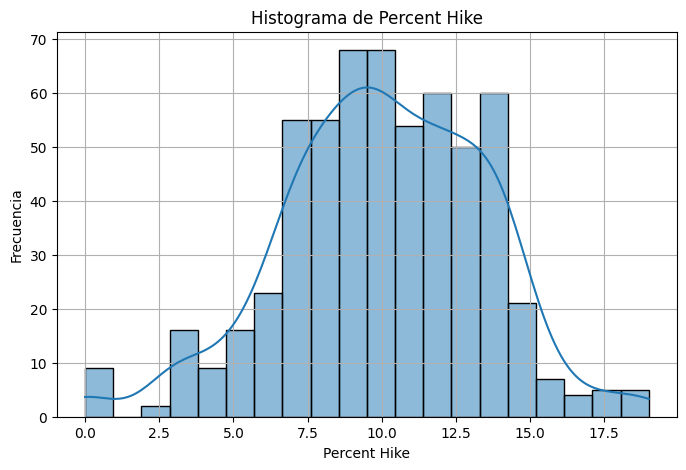

In [3672]:
# Graficar histograma de 'percent_hike'
plt.figure(figsize=(8, 5))
sns.histplot(HR_Interventions['percent_hike'], bins=20, kde=True)  # kde=True añade la curva de densidad

# Personalizar el gráfico
plt.xlabel('Percent Hike')
plt.ylabel('Frecuencia')
plt.title('Histograma de Percent Hike')
plt.grid(True)

# Mostrar gráfico
plt.show()

In [3678]:
HR_Interventions  = pd.concat([HR_Interventions , y_test_2], axis=1)
HR_Interventions.head()

,location_New York,location_Orlando,gender_Male,rating_Acceptable,rating_Below Average,rating_Excellent,rating_Unacceptable,mgr_rating_Acceptable,mgr_rating_Below Average,mgr_rating_Excellent,...,job_hop_index,tenure,compa_ratio,y_predict_final,y_probs,risk_bucket,hike_range,percent_hike,turnover,turnover
1272,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.278179,-0.247474,-0.495605,0,0.327108,no-risk,0 to 10,7,0,0
1299,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.585116,-0.624831,-0.552665,0,0.007620,no-risk,11 to 15,12,0,0
35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.680617,-0.945145,-0.638254,1,0.847592,high-risk,0 to 10,6,1,1
1000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.190156,-0.392274,-1.009141,1,0.932344,high-risk,11 to 15,12,1,1
77,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.409861,-0.651158,1.957951,0,0.016074,no-risk,11 to 15,11,0,0


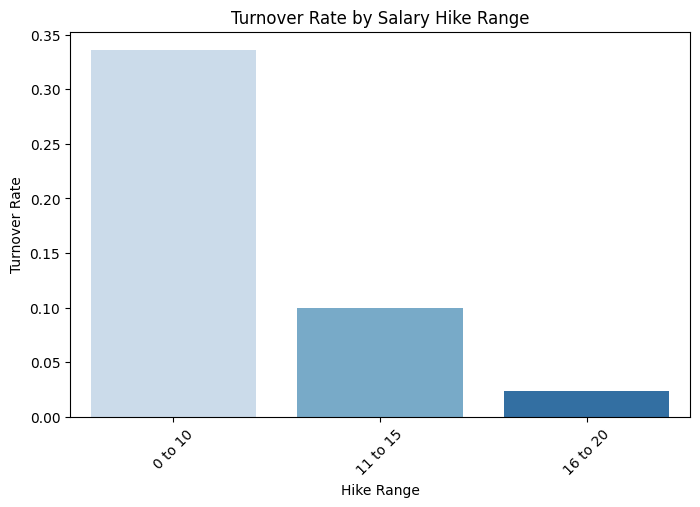

In [3674]:
# Calcular la tasa de turnover para cada rango de aumento salarial
df_hike = HR_Interventions.groupby('hike_range', observed = True)['turnover'].mean().reset_index()
df_hike.rename(columns={'turnover': 'turnover_rate_hike'}, inplace=True)

# Visualizar los resultados con un gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(data=df_hike, x='hike_range', y='turnover_rate_hike', hue='hike_range', palette='Blues', legend=False)

# Personalización del gráfico
plt.xlabel("Hike Range")
plt.ylabel("Turnover Rate")
plt.title("Turnover Rate by Salary Hike Range")
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.show()

- **La tasa de rotación de empleados en el rango de aumento salarial del 0 al 10 % es mayor que en los rangos de aumento salarial del 11 al 15 % y del 16 al 20 %.**

#### **CALCULAR EL ROI:**

**Según el modelo, el porcentaje de aumento es uno de los principales impulsores de la rotación.**

**Ahora, supongamos que si a todos los empleados que recibieron un aumento salarial de entre el 0 % y el 10 % se les ofreciera un aumento de entre el 10 % y el 15 %, es muy probable que hubiéramos podido retener a la mayoría de los empleados.**

**Se estima que la retención exitosa de un empleado en el nivel de analista le ahorra aproximadamente $40,000 USD a la empresa. Por supuesto, aumentar el aumento salarial representa un costo adicional para la empresa. Por lo tanto, en este ejercicio, calculará el retorno de la inversión (ROI) para aumentar el salario del empleado.**


In [3675]:
median_salary_analyst = data_churn.groupby('level')['compensation'].mean()
median_salary_analyst = median_salary_analyst.iloc[0]

In [3676]:
turnover_cost = 40000

**Supongamos que el salario medio para un 'Analista' es de 55.000$. Y el coste de reemplazar a un empleado es de 40.000$.**

In [3677]:
# Compute extra cost
extra_cost = median_salary_analyst * (0.15 - 0.10)  #se multiplica por 0.05 porque queremos incrementar el salario en un 5%.

# Compute savings
savings =  turnover_cost * (0.32 - 0.15)  #Hay una reducción en cuanto al ahorro en la tasa de rotación del 15%. La original era un 32%.

# Calculate ROI
ROI = (savings / extra_cost) * 100

# Print ROI
print("The return on investment is ", round(ROI), "%!")

The return on investment is  248 %!


**Como conclusión del ejercicio, podemos decir que nos sale más rentable económicamente aumentar el salario de los empleados un 5% en vez de reemplazar a los empleados.**